# Introduction
<br>
<div style="background-color: #78E8A3; padding: 20px">
<h3>More analysis!</h3>
<p>After presenting the insights obtained from the speeches, your editor said he enjoyed it and wanted more.
    
You decided to read up scientific literature, and found that a team of researchers found that <u>high noun-to-verb ratio is a subtle linguistic trait that can reduce anger in response to policies</u>. Source: <a href='https://journals.sagepub.com/doi/abs/10.1177/0956797618772823?journalCode=pssa&'>here</a>.
    
Perhaps this is your next hypothesis: Trump’s speech has a higher noun-to-verb ratio, given how embattled his term has been as compared to Obama’s speech, given that the latter’s term has been relatively more peaceful.
</div>

In this Part, you will:
1. Practice using popular NLP library spaCy 
2. Use spaCy to extract parts-of-speech tags from the speeches
3. Calculate the noun-to-verb scores for the speeches

### Step 1: Import your libraries
Apart from pandas, we'll be using popular NLP library spaCy - check out the documentation <a href='https://spacy.io/usage'>here</a>. We'll also be loading 
1. pandas as pd
2. spaCy

In [1]:
import pandas as pd
import spacy

### Step 2: Give spaCy a test drive
We'll be referring to the documentation found here: https://spacy.io/usage/linguistic-features

Parts-of-speech (POS) will be extracted from the text.

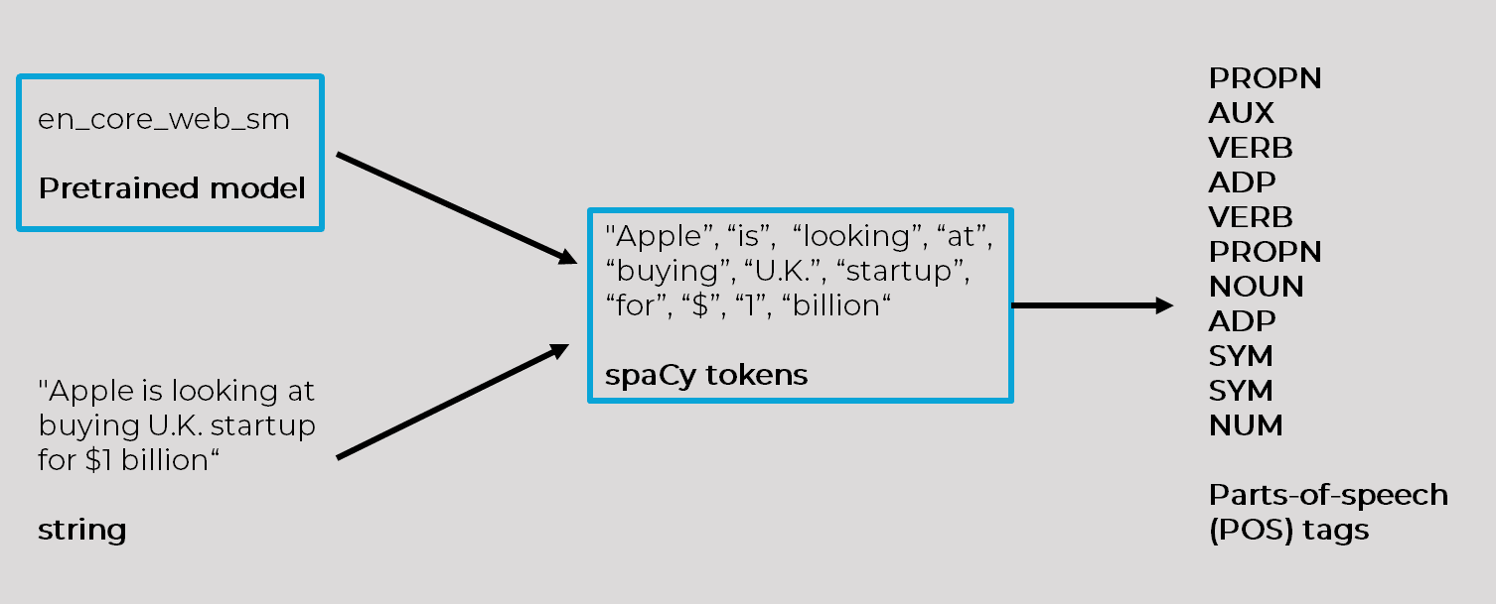

Generally, the analysis goes like this:
1. Load the spaCy model
2. Wrap the model around the string to be analyzed into a doc object
3. Get the attribute that you want (in our case it's just POS)

The example given in the URL will give all of the features, but just print out the POS tags by selecting the right attribute.

<font color = 'red'>Note that you might have to troubleshoot the part where you can not load the spaCy model. <br>
   If there is an error, the easiest fix is to google the error messages - there forums that can help you solve this model problem.</font>

In [2]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
    print(token.tag_)

C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.4). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


NNP
VBZ
VBG
IN
VBG
NNP
NN
IN
$
CD
CD


### Step 3: Read the CSV from Part III
Time to read the CSV you exported from Part III as a DataFrame.

In [3]:
df = pd.read_csv('speechDF2.csv')
df.head(10)

,filename,name,year,speech,len_speech,sentences,num_sentences,average_sen_length,SMOG_index,Flesch_score
0,obama2010.txt,obama,2010,"Madam Speaker, Vice President Biden, members o...",43698,"['Madam Speaker, Vice President Biden, members...",562,77.754448,17.826429,24.720575
1,obama2011.txt,obama,2011,"Mr. Speaker, Mr. Vice President, members of Co...",41023,"['Mr', ' Speaker, Mr', ' Vice President, membe...",500,82.046000,16.543303,32.322806
2,obama2012.txt,obama,2012,"Mr. Speaker, Mr. Vice President, members of C...",42204,"[' Mr', ' Speaker, Mr', ' Vice President, memb...",518,81.474903,17.344065,26.228014
3,obama2013.txt,obama,2013,"Mr. Speaker, Mr. Vice President, members of Co...",41202,"['Mr', ' Speaker, Mr', ' Vice President, membe...",455,90.553846,14.187551,52.062427
4,obama2014.txt,obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co...",40009,"['Mr', ' Speaker, Mr', ' Vice President, Membe...",352,113.661932,19.064501,9.227649
5,obama2015.txt,obama,2015,"Mr. Speaker, Mr. Vice President, Members of Co...",40269,"['Mr', ' Speaker, Mr', ' Vice President, Membe...",466,86.414163,13.518314,56.194377
6,obama2016.txt,obama,2016,"Mr. Speaker, Mr. Vice President, Members of Co...",31167,"['Mr', ' Speaker, Mr', "" Vice President, Membe...",305,102.186885,17.441406,25.062509
7,trump2018.txt,trump,2018,"Mr. Speaker, Mr. Vice President, Members of Co...",30457,"['Mr', ' Speaker, Mr', ' Vice President, Membe...",323,94.294118,13.843611,51.034490
8,trump2019.txt,trump,2019,"Madam Speaker, Mr. Vice President, Members of ...",30945,"['Madam Speaker, Mr', ' Vice President, Member...",298,103.842282,14.799100,44.106260
9,trump2020.txt,trump,2020,Thank you very much. Thank you. Thank you v...,39649,"[' Thank you very much', ' Thank you', ' Tha...",557,71.183124,16.381695,33.439536


### Step 4: Get the POS tags from Obama's 2010 speech and store in a list
We'll start off with analyzing and getting the POS tags from Obama's 2010 speech.

Similar to Step 2, we will be extracting the tags but instead of printing them, let's store them in a list for analysis.

Follow what Step 2 did, except instead of printing the tags, append them to a list.

In [16]:
tag2010 = []
x = nlp(df['speech'][0])
for t in x:
    tag2010.append(t.tag_)

### Step 5: Turn the list into a Counter object
Now that you have a list of items, what you want next is to tabulate the items in the list, i.e. get the count of values.

Were this a DataFrame column, it'd be as easy as a .value_counts call.

However, since this is a list, you can simply use the Counter from the collections library. The Counter object is essentially like a dictionary, allowing you to get the total count of the items in the list.

<strong>Hint: Google "using a dictionary to count the items in a list"</strong>

In [17]:
from collections import Counter

In [18]:
g = Counter(tag2010)
print(g)

Counter({'NN': 1087, 'IN': 830, 'DT': 712, 'NNS': 552, '.': 549, 'PRP': 500, 'VB': 497, 'JJ': 477, 'RB': 382, ',': 348, 'CC': 309, 'VBP': 307, 'NNP': 245, 'VBZ': 194, 'PRP$': 179, 'TO': 176, 'MD': 170, ':': 165, 'VBG': 157, 'VBN': 152, 'VBD': 135, '-RRB-': 123, '-LRB-': 122, '_SP': 112, 'CD': 100, 'WDT': 85, 'WRB': 66, 'WP': 64, 'JJR': 48, 'NNPS': 44, 'RP': 38, 'RBR': 22, 'HYPH': 22, 'JJS': 21, 'POS': 17, 'EX': 16, '$': 11, '``': 8, "''": 8, 'PDT': 7, 'RBS': 6, 'UH': 6, 'NFP': 2, 'WP$': 1, 'FW': 1, 'SYM': 1})


In [25]:
g['NN']+g['NNS']+g['NNP']+g['NNPS']

1928

### Step 6: Create NOUN_count and VERB_count columns in your DataFrame
Now that you know how to get the NOUN and VERB count using a Counter, you can then extract their counts for each of the speeches. 

Again, we're looking only at NOUN and VERB counts because we will be deriving a noun-to-verb ratio as a metric for alleviating anger towards policies.

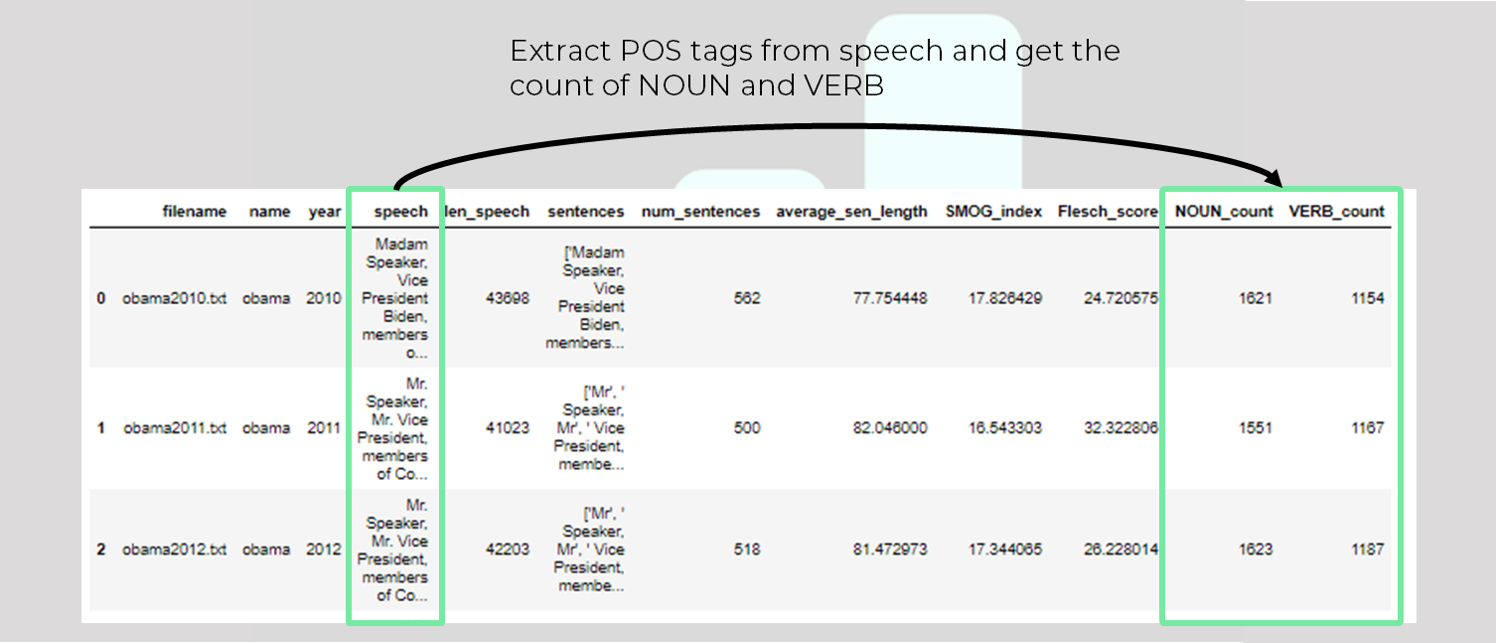

<strong>Hint: Place Step 4 and Step 5 under a for loop and append the counts in two lists to create the two new columns</strong>

In [26]:
n_count = []
v_count = []
for i, j in df.iterrows():
    tag = []
    m = nlp(j['speech'])
    for t in m:
        tag.append(t.tag_)
    b = Counter(tag)
    n_count.append(b['NN']+b['NNS']+b['NNP']+b['NNPS'])
    v_count.append(b['VB']+b['VBD']+b['VBG']+b['VBN']+b['VBP']+b['VBZ'])

In [29]:
df['NOUN_count'] = pd.DataFrame(n_count)
df['VERB_count'] = pd.DataFrame(v_count)

In [30]:
df.head()

,filename,name,year,speech,len_speech,sentences,num_sentences,average_sen_length,SMOG_index,Flesch_score,NOUN_count,VERB_count
0,obama2010.txt,obama,2010,"Madam Speaker, Vice President Biden, members o...",43698,"['Madam Speaker, Vice President Biden, members...",562,77.754448,17.826429,24.720575,1928,1442
1,obama2011.txt,obama,2011,"Mr. Speaker, Mr. Vice President, members of Co...",41023,"['Mr', ' Speaker, Mr', ' Vice President, membe...",500,82.046000,16.543303,32.322806,1856,1329
2,obama2012.txt,obama,2012,"Mr. Speaker, Mr. Vice President, members of C...",42204,"[' Mr', ' Speaker, Mr', ' Vice President, memb...",518,81.474903,17.344065,26.228014,1956,1331
3,obama2013.txt,obama,2013,"Mr. Speaker, Mr. Vice President, members of Co...",41202,"['Mr', ' Speaker, Mr', ' Vice President, membe...",455,90.553846,14.187551,52.062427,1930,1249
4,obama2014.txt,obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co...",40009,"['Mr', ' Speaker, Mr', ' Vice President, Membe...",352,113.661932,19.064501,9.227649,1908,1284


### Step 7: Create the noun-to-verb ratio column
Create a new column called 'noun_to_verb', which contains the ratio where NOUN_count is divided by VERB_count.

In [31]:
df['noun_to_verb'] = df['NOUN_count']/df['VERB_count']

In [33]:
df.head(10)

,filename,name,year,speech,len_speech,sentences,num_sentences,average_sen_length,SMOG_index,Flesch_score,NOUN_count,VERB_count,noun_to_verb
0,obama2010.txt,obama,2010,"Madam Speaker, Vice President Biden, members o...",43698,"['Madam Speaker, Vice President Biden, members...",562,77.754448,17.826429,24.720575,1928,1442,1.337032
1,obama2011.txt,obama,2011,"Mr. Speaker, Mr. Vice President, members of Co...",41023,"['Mr', ' Speaker, Mr', ' Vice President, membe...",500,82.046000,16.543303,32.322806,1856,1329,1.396539
2,obama2012.txt,obama,2012,"Mr. Speaker, Mr. Vice President, members of C...",42204,"[' Mr', ' Speaker, Mr', ' Vice President, memb...",518,81.474903,17.344065,26.228014,1956,1331,1.469572
3,obama2013.txt,obama,2013,"Mr. Speaker, Mr. Vice President, members of Co...",41202,"['Mr', ' Speaker, Mr', ' Vice President, membe...",455,90.553846,14.187551,52.062427,1930,1249,1.545236
4,obama2014.txt,obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co...",40009,"['Mr', ' Speaker, Mr', ' Vice President, Membe...",352,113.661932,19.064501,9.227649,1908,1284,1.485981
5,obama2015.txt,obama,2015,"Mr. Speaker, Mr. Vice President, Members of Co...",40269,"['Mr', ' Speaker, Mr', ' Vice President, Membe...",466,86.414163,13.518314,56.194377,1815,1314,1.381279
6,obama2016.txt,obama,2016,"Mr. Speaker, Mr. Vice President, Members of Co...",31167,"['Mr', ' Speaker, Mr', "" Vice President, Membe...",305,102.186885,17.441406,25.062509,1344,1071,1.254902
7,trump2018.txt,trump,2018,"Mr. Speaker, Mr. Vice President, Members of Co...",30457,"['Mr', ' Speaker, Mr', ' Vice President, Membe...",323,94.294118,13.843611,51.034490,1470,891,1.649832
8,trump2019.txt,trump,2019,"Madam Speaker, Mr. Vice President, Members of ...",30945,"['Madam Speaker, Mr', ' Vice President, Member...",298,103.842282,14.799100,44.106260,1544,864,1.787037
9,trump2020.txt,trump,2020,Thank you very much. Thank you. Thank you v...,39649,"[' Thank you very much', ' Thank you', ' Tha...",557,71.183124,16.381695,33.439536,1987,1099,1.808007


### Step 8: Compare Obama's noun-to-verb ratio with Trump's
The moment of truth - the comparison.

Either plot a boxplot like how you did, or just print out the mean of the scores for Obama and Trump.

It's more dramatic if you plot a boxplot though.

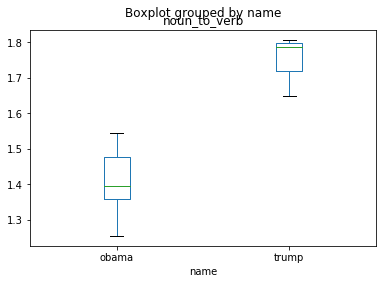

In [34]:
df.boxplot(by ='name', column =['noun_to_verb'], grid = False)

### End of Part IV
There you have it - data that either supports or rejects the hypothesis that Trump has a higher noun-to-verb ratio to reduce anger for his policies. 

If you've followed the steps properly, you would have noticed something interesting (we won't spoil it for you). 

We hope you found this section cool! 

Next up, we will perform sentiment analysis in Part V to see how Obama and Trump's speeches different in terms of the sentiment they convey.

In [35]:
df.to_csv(r'C:\Users\daani\US-Speech-Analysis\speechDF3.csv', index = False, header = True)